## Section 1: Data Analysis

In [1]:
import pandas as pd
import plotly.express as px
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

In [2]:
import warnings
warnings.filterwarnings('ignore')


This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.

This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.

In [3]:
customer_df = pd.read_csv(r'D:\DATA SCIENCE ZONE\Projects\project_5 _E-commerce_Data\In-Depth E-commerce Data Analysis and Customer Segmentation\Dataset\olist\olist_customers_dataset.csv')
orders_df = pd.read_csv(r'D:\DATA SCIENCE ZONE\Projects\project_5 _E-commerce_Data\In-Depth E-commerce Data Analysis and Customer Segmentation\Dataset\olist\olist_orders_dataset.csv')
order_items_df = pd.read_csv(r'D:\DATA SCIENCE ZONE\Projects\project_5 _E-commerce_Data\In-Depth E-commerce Data Analysis and Customer Segmentation\Dataset\olist\olist_order_items_dataset.csv')
order_payments_df = pd.read_csv(r'D:\DATA SCIENCE ZONE\Projects\project_5 _E-commerce_Data\In-Depth E-commerce Data Analysis and Customer Segmentation\Dataset\olist\olist_order_payments_dataset.csv')
products_df = pd.read_csv(r'D:\DATA SCIENCE ZONE\Projects\project_5 _E-commerce_Data\In-Depth E-commerce Data Analysis and Customer Segmentation\Dataset\olist\olist_products_dataset.csv')
sellers_df = pd.read_csv(r'D:\DATA SCIENCE ZONE\Projects\project_5 _E-commerce_Data\In-Depth E-commerce Data Analysis and Customer Segmentation\Dataset\olist\olist_sellers_dataset.csv')
product_categoryname_df = pd.read_csv(r'D:\DATA SCIENCE ZONE\Projects\project_5 _E-commerce_Data\In-Depth E-commerce Data Analysis and Customer Segmentation\Dataset\olist\product_category_name_translation.csv')
order_reviews_df = pd.read_csv(r'D:\DATA SCIENCE ZONE\Projects\project_5 _E-commerce_Data\In-Depth E-commerce Data Analysis and Customer Segmentation\Dataset\olist\olist_order_reviews_dataset.csv')

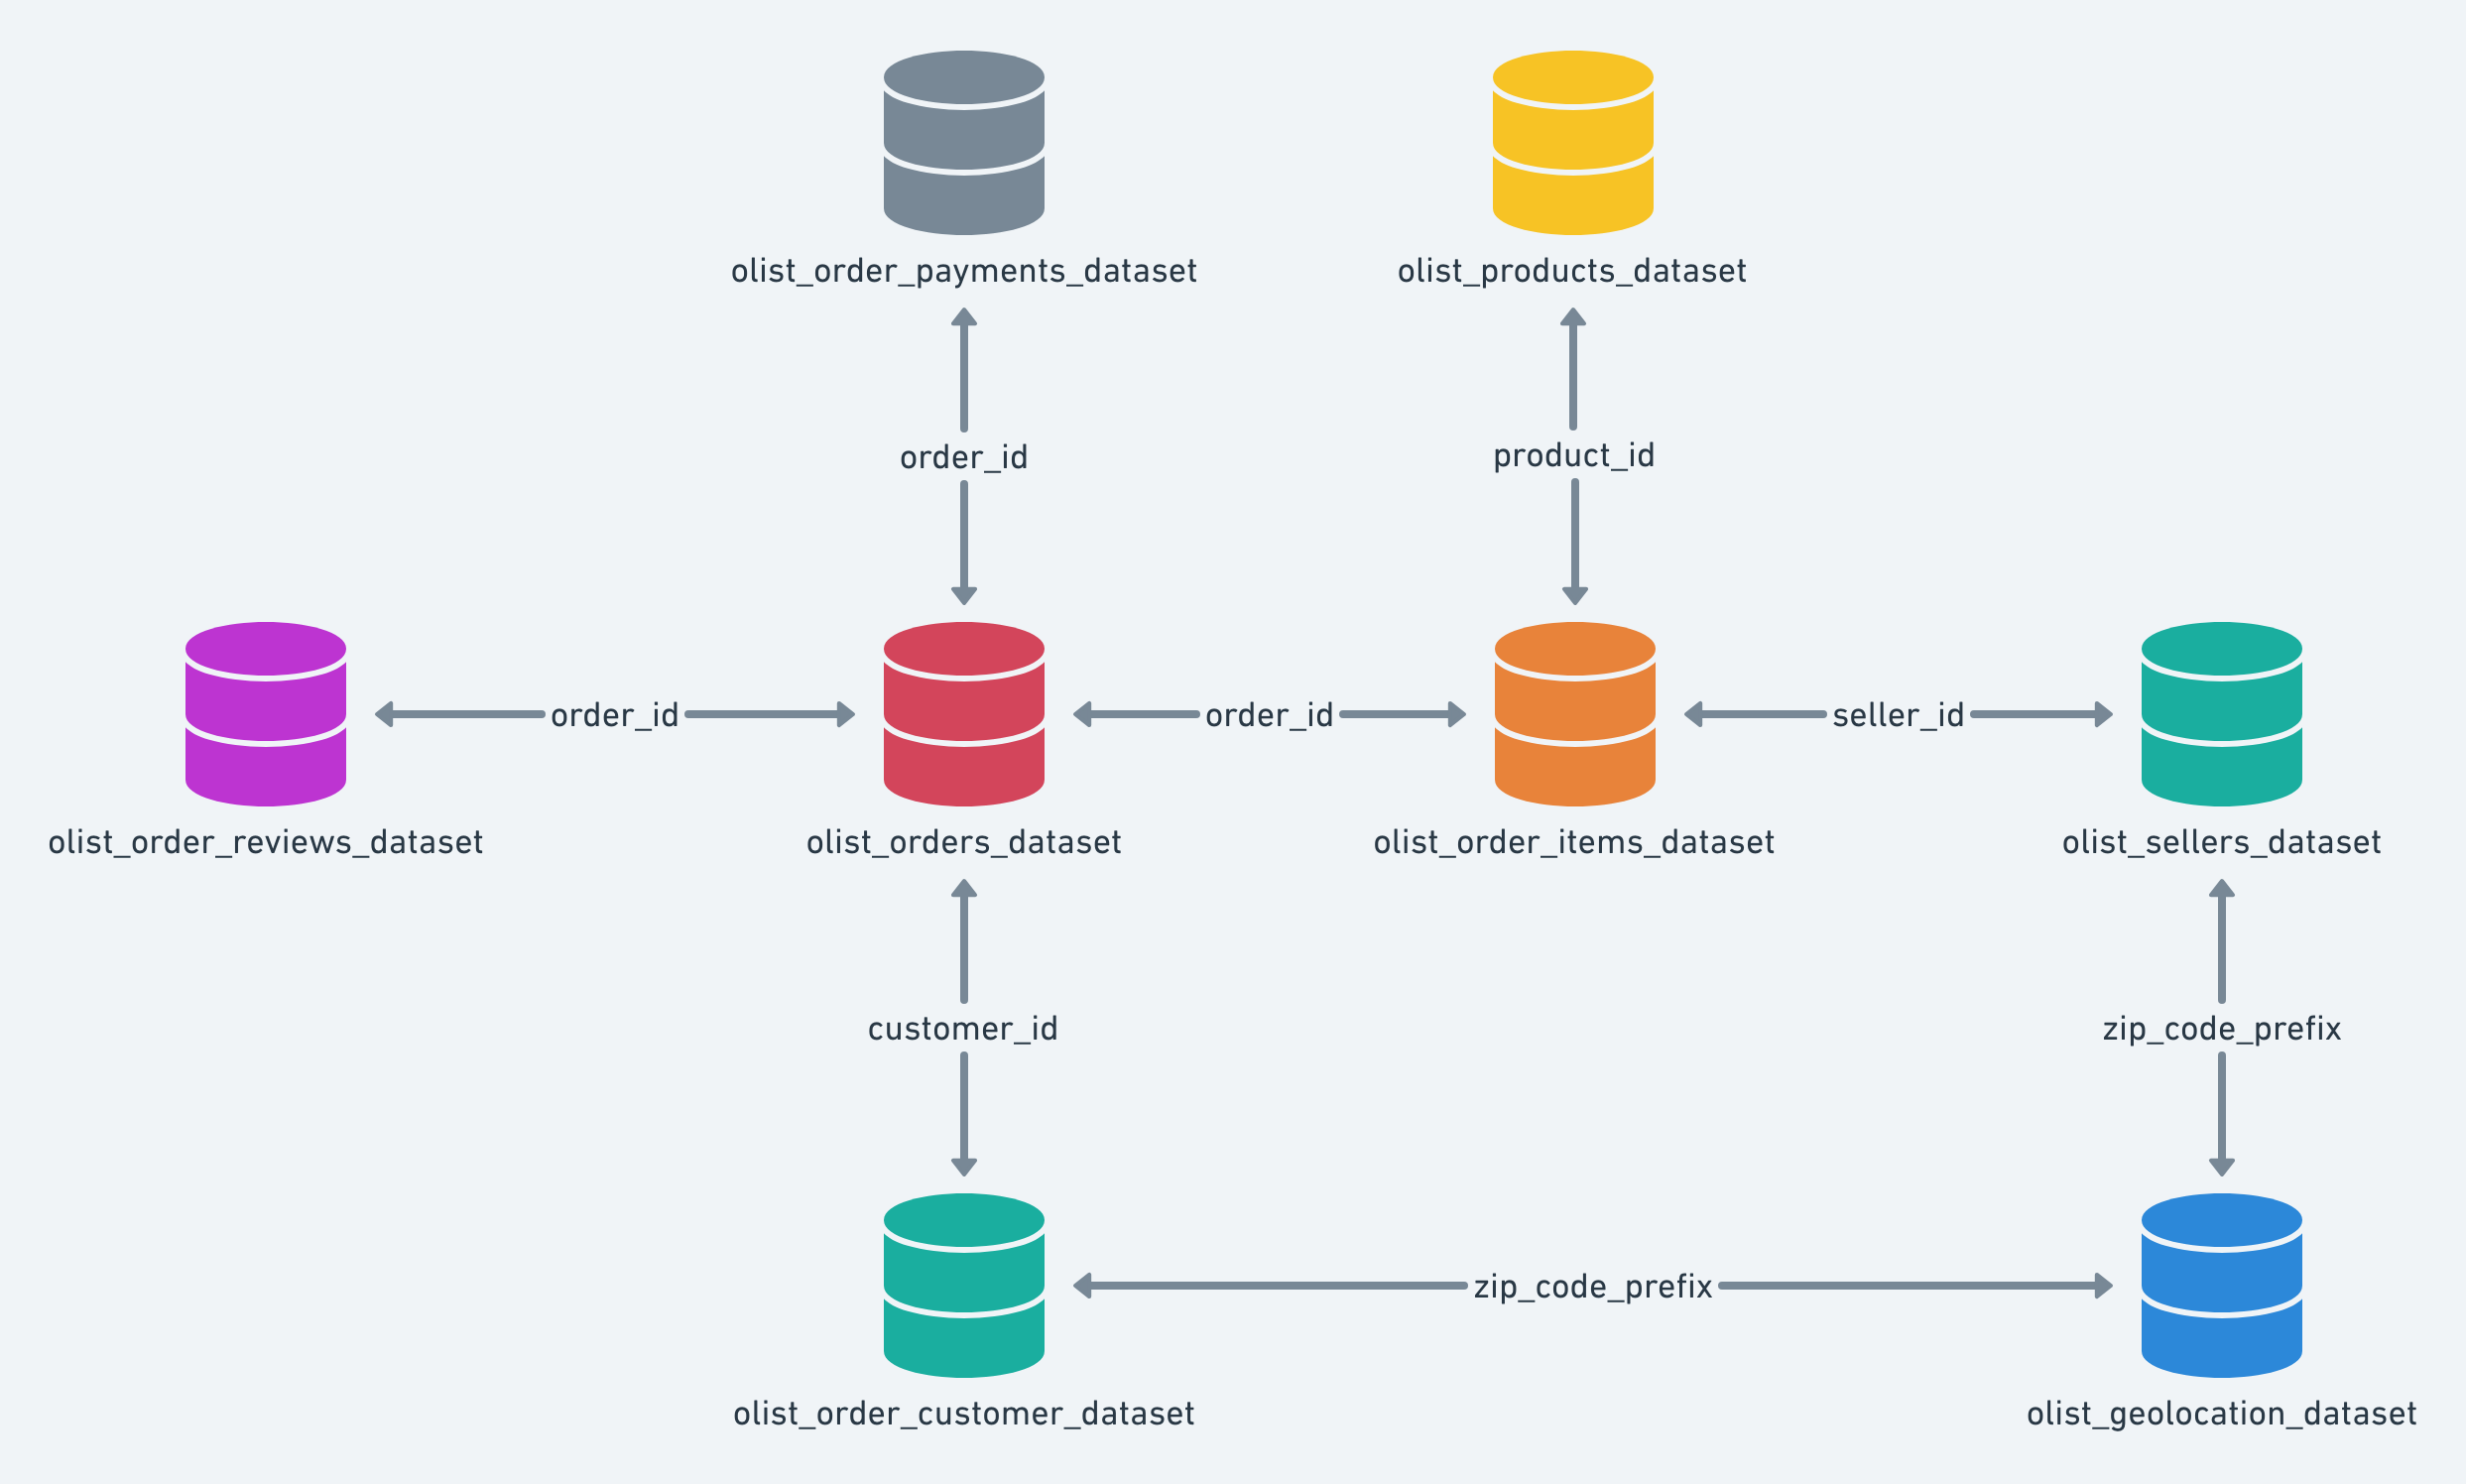

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**customer_id**
key to the orders dataset. Each order has a unique customer_id.

**customer_unique_id**
unique identifier of a customer.

**customer_zip_code_prefix**
first five digits of customer zip code

**customer_city**
customer city name

**customer_state**
customer state

In [6]:
customer_df.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [7]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**order_id**
unique identifier of the order.

**customer_id**
key to the customer dataset. Each order has a unique customer_id.

**order_status**
Reference to the order status (delivered, shipped, etc).

**order_purchase_timestamp**
Shows the purchase timestamp.

**order_approved_at**
Shows the payment approval timestamp.

**order_delivered_carrier_date**
Shows the order posting timestamp. When it was handled to the logistic partner.

**order_delivered_customer_date**
Shows the actual order delivery date to the customer.

**order_estimated_delivery_date**
Shows the estimated delivery date that was informed to customer at the purchase moment.

In [8]:
orders_df.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [9]:
# Handle any non-standard formats and convert to datetime
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

In [10]:
orders_df.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [11]:
# Taking out the important Columns
orders_df = orders_df[["order_id","customer_id","order_status","order_purchase_timestamp","order_estimated_delivery_date","order_delivered_customer_date"]]

In [12]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**order_id**
order unique identifier

**order_item_id**
sequential number identifying number of items included in the same order.

**product_id**
product unique identifier

**seller_id**
seller unique identifier

**shipping_limit_date**
Shows the seller shipping limit date for handling the order over to the logistic partner.

**price**
item price

**freight_value**
item freight value item (if an order has more than one item the freight value is splitted between items)

In [13]:
order_items_df.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [14]:
# Taking out the important Columns
order_items_df = order_items_df[["order_id","order_item_id","product_id","seller_id","price","freight_value"]]

In [15]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**order_id**
unique identifier of an order.

**payment_sequential**
a customer may pay an order with more than one payment method. If he does so, a sequence will be created to accommodate all payments.

**payment_type**
method of payment chosen by the customer.

**payment_installments**
number of installments chosen by the customer.

**payment_value**
transaction value.

In [16]:
# Aggregate payment data by order_id
aggregated_payments = order_payments_df.groupby('order_id').agg({
    'payment_value': 'sum',
    'payment_installments': 'sum',
    'payment_type': lambda x: '+'.join(pd.Series(x).unique())  # Combine unique payment types as a comma-separated string
}).reset_index()

# Rename columns 
aggregated_payments.columns = ['order_id', 'total_payment_value', 'total_installments', 'payment_types']


In [17]:
aggregated_payments

,order_id,total_payment_value,total_installments,payment_types
0,00010242fe8c5a6d1ba2dd792cb16214,72.19,2,credit_card
1,00018f77f2f0320c557190d7a144bdd3,259.83,3,credit_card
2,000229ec398224ef6ca0657da4fc703e,216.87,5,credit_card
3,00024acbcdf0a6daa1e931b038114c75,25.78,2,credit_card
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04,3,credit_card
...,...,...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,343.40,1,boleto
99436,fffcd46ef2263f404302a634eb57f7eb,386.53,1,boleto
99437,fffce4705a9662cd70adb13d4a31832d,116.85,3,credit_card
99438,fffe18544ffabc95dfada21779c9644f,64.71,3,credit_card


In [18]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**product_id**
unique product identifier

**product_category_name**
root category of product, in Portuguese.

**product_name_lenght**
number of characters extracted from the product name.

**product_description_lenght**
number of characters extracted from the product description.

**product_photos_qty**
number of product published photos

**product_weight_g**
product weight measured in grams.

**product_length_cm**
product length measured in centimeters.

**product_height_cm**
product height measured in centimeters.

**product_width_cm**
product width measured in centimeters.

In [19]:
products_df.dtypes

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

In [20]:
# Taking out the important Columns
products_df = products_df[["product_id","product_category_name"]]

In [21]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**seller_id**
seller unique identifier

**seller_zip_code_prefix**
first 5 digits of seller zip code

**seller_city**
seller city name

**seller_state**
seller state

In [22]:
sellers_df.dtypes

seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

In [23]:
product_categoryname_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**product_category_name**
category name in Portuguese

**product_category_name_english**
category name in English

In [24]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


**review_id**
unique review identifier

**order_id**
unique order identifier

**review_score**
Note ranging from 1 to 5 given by the customer on a satisfaction survey.

**review_comment_title**
Comment title from the review left by the customer, in Portuguese.

**review_comment_message**
Comment message from the review left by the customer, in Portuguese.

**review_creation_date**
Shows the date in which the satisfaction survey was sent to the customer.

**review_answer_timestamp**
Shows satisfaction survey answer timestamp.

In [25]:
order_reviews_df.dtypes

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [26]:
# Convert all values to strings and remove the timestamp
order_reviews_df['review_creation_date'] = order_reviews_df['review_creation_date'].astype(str).apply(lambda x: x.split()[0] if ' ' in x else x[:10])

# Handle any non-standard formats and convert to datetime
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'], errors='coerce', format='%Y-%m-%d')



In [27]:
order_reviews_df.dtypes

review_id                          object
order_id                           object
review_score                        int64
review_comment_title               object
review_comment_message             object
review_creation_date       datetime64[ns]
review_answer_timestamp            object
dtype: object

In [28]:
# Taking out the important Columns
order_reviews_df = order_reviews_df[["review_id","order_id","review_score","review_creation_date"]]

## Merging all the datasets

In [29]:
# Step 1: Merge orders with customers
df = pd.merge(orders_df, customer_df, on="customer_id", how="inner")

# Step 2: Merge the result with order items
df = df.merge(order_items_df, on="order_id", how="inner")

# Step 3: Merge with products
df = df.merge(products_df, on="product_id", how="inner")

# Step 4: Merge with product category names (left join to keep all products even if category name is missing)
df = df.merge(product_categoryname_df, on="product_category_name", how="left")

# Step 5: Merge with sellers
df = df.merge(sellers_df, on="seller_id", how="inner")

# Step 6: Merge with order reviews (left join to keep all orders even if there are no reviews)
df = df.merge(order_reviews_df, on="order_id", how="left")

# Step 7: Merge with payment details
df = df.merge(aggregated_payments, on="order_id", how="inner")



In [30]:
df.shape

(113311, 26)

In [31]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,order_delivered_customer_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,product_category_name,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_creation_date,total_payment_value,total_installments,payment_types
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,utilidades_domesticas,housewares,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11,38.71,3,credit_card+voucher
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13,2018-08-07 15:27:45,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,perfumaria,perfumery,31570,belo horizonte,SP,8d5266042046a06655c8db133d120ba5,4.0,2018-08-08,141.46,1,boleto
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04,2018-08-17 18:06:29,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,automotivo,auto,14840,guariba,SP,e73b67b67587f7644d5bd1a52deb1b01,5.0,2018-08-18,179.12,3,credit_card
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-15,2017-12-02 00:28:42,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20,pet_shop,pet_shop,31842,belo horizonte,MG,359d03e676b3c069f62cadba8dd3f6e8,5.0,2017-12-03,72.20,1,credit_card
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-26,2018-02-16 18:17:02,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72,papelaria,stationery,8752,mogi das cruzes,SP,e50934924e227544ba8246aeb3770dd4,5.0,2018-02-17,28.62,1,credit_card


In [32]:
# Taking out the important Columns
df = df[["order_id","customer_id","customer_unique_id","order_purchase_timestamp","order_status","order_estimated_delivery_date","order_delivered_customer_date","total_payment_value","total_installments","payment_types","customer_zip_code_prefix","customer_city","customer_state","order_item_id","product_id","price","freight_value","product_category_name_english","seller_id","seller_zip_code_prefix","seller_city","seller_state","review_id","review_score","review_creation_date"]]

In [33]:
df

,order_id,customer_id,customer_unique_id,order_purchase_timestamp,order_status,order_estimated_delivery_date,order_delivered_customer_date,total_payment_value,total_installments,payment_types,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,price,freight_value,product_category_name_english,seller_id,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_creation_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,delivered,2017-10-18,2017-10-10 21:25:13,38.71,3,credit_card+voucher,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,8.72,housewares,3504c0cb71d7fa48d967e0e4c94d59d9,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,delivered,2018-08-13,2018-08-07 15:27:45,141.46,1,boleto,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,perfumery,289cdb325fb7e7f891c38608bf9e0962,31570,belo horizonte,SP,8d5266042046a06655c8db133d120ba5,4.0,2018-08-08
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,delivered,2018-09-04,2018-08-17 18:06:29,179.12,3,credit_card,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,159.90,19.22,auto,4869f7a5dfa277a7dca6462dcf3b52b2,14840,guariba,SP,e73b67b67587f7644d5bd1a52deb1b01,5.0,2018-08-18
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,delivered,2017-12-15,2017-12-02 00:28:42,72.20,1,credit_card,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,pet_shop,66922902710d126a0e7d26b0e3805106,31842,belo horizonte,MG,359d03e676b3c069f62cadba8dd3f6e8,5.0,2017-12-03
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39,delivered,2018-02-26,2018-02-16 18:17:02,28.62,1,credit_card,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72,stationery,2c9e548be18521d1c43cde1c582c6de8,8752,mogi das cruzes,SP,e50934924e227544ba8246aeb3770dd4,5.0,2018-02-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113306,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,da62f9e57a76d978d02ab5362c509660,2018-02-06 12:58:58,delivered,2018-03-02,2018-02-28 17:37:56,195.00,3,credit_card,11722,praia grande,SP,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90,20.10,baby,1f9ab4708f3056ede07124aad39a2554,17602,tupa,SP,29bb71b2760d0f876dfa178a76bc4734,4.0,2018-03-01
113307,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,737520a9aad80b3fbbdad19b66b37b30,2017-08-27 14:46:43,delivered,2017-09-27,2017-09-21 11:24:17,271.01,5,credit_card,45920,nova vicosa,BA,1,b80910977a37536adeddd63663f916ad,205.99,65.02,home_appliances_2,d50d79cb34e38265a8649c383dcffd48,8290,sao paulo,SP,371579771219f6db2d830d50805977bb,5.0,2017-09-22
113308,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,5097a5312c8b157bb7be58ae360ef43c,2018-01-08 21:28:27,delivered,2018-02-15,2018-01-25 23:32:54,441.16,4,credit_card,28685,japuiba,RJ,1,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59,computers_accessories,a1043bafd471dff536d0c462352beb48,37175,ilicinea,MG,8ab6855b9fe9b812cd03a480a25058a1,2.0,2018-01-26
113309,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,5097a5312c8b157bb7be58ae360ef43c,2018-01-08 21:28:27,delivered,2018-02-15,2018-01-25 23:32:54,441.16,4,credit_card,28685,japuiba,RJ,2,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59,computers_accessories,a1043bafd471dff536d0c462352beb48,37175,ilicinea,MG,8ab6855b9fe9b812cd03a480a25058a1,2.0,2018-01-26


In [34]:
df.payment_types.unique()

array(['credit_card+voucher', 'boleto', 'credit_card',
       'voucher+credit_card', 'debit_card', 'voucher',
       'credit_card+debit_card'], dtype=object)

In [35]:
df.payment_types.value_counts()

payment_types
credit_card               84423
boleto                    23018
debit_card                 1697
voucher                    1672
credit_card+voucher        1254
voucher+credit_card        1246
credit_card+debit_card        1
Name: count, dtype: int64

In [36]:
df['payment_types'] = df['payment_types'].apply(lambda x: '+'.join(sorted(set(x.split('+')))))

In [37]:
df.payment_types.unique()

array(['credit_card+voucher', 'boleto', 'credit_card', 'debit_card',
       'voucher', 'credit_card+debit_card'], dtype=object)

In [38]:
df.payment_types.value_counts()

payment_types
credit_card               84423
boleto                    23018
credit_card+voucher        2500
debit_card                 1697
voucher                    1672
credit_card+debit_card        1
Name: count, dtype: int64

In [39]:
#Checking for null values
df.isnull().sum()

order_id                            0
customer_id                         0
customer_unique_id                  0
order_purchase_timestamp            0
order_status                        0
order_estimated_delivery_date       0
order_delivered_customer_date    2475
total_payment_value                 0
total_installments                  0
payment_types                       0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                       0
product_id                          0
price                               0
freight_value                       0
product_category_name_english    1636
seller_id                           0
seller_zip_code_prefix              0
seller_city                         0
seller_state                        0
review_id                         942
review_score                      942
review_creation_date              942
dtype: int64

**Missing Values in the Dataset**

- **order_delivered_customer_date:** 2,475 missing values. 
  - Indicates some orders are not delivered or the delivery date was not recorded.
  
- **product_category_name_english:** 1,636 missing values.
  - Some products are missing category information.

- **review_id, review_score, review_creation_date:** 942 missing values each.
  - These missing values suggest that some orders did not receive reviews or the review details are missing.


In [40]:
# Filling Missing Product Categories
df['product_category_name_english'] = df['product_category_name_english'].fillna('Unknown')

In [41]:
df.isnull().sum()

order_id                            0
customer_id                         0
customer_unique_id                  0
order_purchase_timestamp            0
order_status                        0
order_estimated_delivery_date       0
order_delivered_customer_date    2475
total_payment_value                 0
total_installments                  0
payment_types                       0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                       0
product_id                          0
price                               0
freight_value                       0
product_category_name_english       0
seller_id                           0
seller_zip_code_prefix              0
seller_city                         0
seller_state                        0
review_id                         942
review_score                      942
review_creation_date              942
dtype: int64

In [42]:
xxxx = df[df['review_id'].isnull()]


In [43]:
xx  = df.loc[df.review_score.isnull()]
xx.order_status.value_counts()

order_status
delivered     827
shipped        86
canceled       17
processing      6
invoiced        6
Name: count, dtype: int64

Most of the null values in rating belongs to delivered products

In [44]:
# Dropping rows with NaN values in the specified columns
df = df.dropna(subset=['review_id', 'review_score', 'review_creation_date'])

In [45]:
df.isnull().sum()

order_id                            0
customer_id                         0
customer_unique_id                  0
order_purchase_timestamp            0
order_status                        0
order_estimated_delivery_date       0
order_delivered_customer_date    2360
total_payment_value                 0
total_installments                  0
payment_types                       0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                       0
product_id                          0
price                               0
freight_value                       0
product_category_name_english       0
seller_id                           0
seller_zip_code_prefix              0
seller_city                         0
seller_state                        0
review_id                           0
review_score                        0
review_creation_date                0
dtype: int64

In [46]:
# Filling the null values of order_delivered_customer_date by order_estimated_delivery_date
df["order_delivered_customer_date"].fillna(df["order_estimated_delivery_date"], inplace=True)

In [47]:

xx = df.groupby(["customer_id",'product_id']).order_id.count().reset_index()
xx= xx.rename(columns= {"order_id":"order_count"})

In [48]:
xx

,customer_id,product_id,order_count
0,00012a2ce6f8dcda20d059ce98491703,64315bd8c0c47303179dd2e25b579d00,1
1,000161a058600d5901f007fab4c27140,84183944dc7cddca87a5d384452c1d3c,1
2,0001fd6190edaaf884bcaf3d49edf079,9df2b21ec85378d71df4404712e17478,1
3,0002414f95344307404f0ace7a26f1d5,af3ec22cce878225aae6d9eb6c7a78eb,1
4,000379cdec625522490c315e70c7a9fb,868b3136c5b206f91b8208fbfdf2cb7c,1
...,...,...,...
101622,fffcb937e9dd47a13f05ecb8290f4d3e,2eb705094d8383cfa50e8965dddc8a7e,1
101623,fffecc9f79fd8c764f843e9951b11341,c045b19fdb30a3035c56d04c6fe2e622,1
101624,fffeda5b6d849fbd39689bb92087f431,d5c263f4d651ba657c900ce70a4be7de,1
101625,ffff42319e9b2d713724ae527742af25,e61c78a7343d82c0539d27df0f7dfc31,1


In [49]:
xx.loc[xx.order_count >1]

,customer_id,product_id,order_count
12,00066ccbe787a588c52bd5ff404590e3,368c6c730842d78016ad823897a372db,4
15,000bf8121c3412d3057d32371c5d3395,bae1013381fa74d68d18c89d313f97eb,2
80,00331de1659c7f4fb660c8810e6de3f5,54d2c5fad57672a4137d94c034827a13,3
81,0033823ee55671ac5317d423291333c2,4ac50dbde931c0a5ed8c33d3dc047351,2
88,003a75d228dc67cb2918e40c2aacc4bf,d1802b79d2e79841cc2cadedd8d4e6a3,2
...,...,...,...
101575,ffde64401f7cb62d2e8696d9467c781d,8ed094bfe076c568f6bb10feada3f75d,2
101595,ffed5d4f6245fe13cd57054621eec36a,437c05a395e9e47f9762e677a7068ce7,2
101601,fff168ca1f8a1d2e8e2108b231a68a8c,eeba3ee5aa7d1d571752248eb4c81c20,2
101618,fff93c1da78dafaaa304ff032abc6205,1ae28ef6d0421f92f2e4e6d407e90347,2


### Issue: Duplicate Entries Due to `order_item_id`

**Problem:**
In the dataset, `order_item_id` was expected to be unique for each order item. However, duplicates appeared because other columns (`order_id`, `customer_id`, `product_id`) had identical values, indicating a potential data entry error where the `order_item_id` was incorrectly assigned or duplicated.

### Example Before Fix:

| order_id    | customer_id | order_purchased | order_item_id | product_id |
|-------------|-------------|--------------|-------------------------|------------|
| e4474c18ee  | 00331de     | 2017-12-18 14:54:52	|1             | 54d2c5fa   |
| e4474c18ee  | 00331de     |2017-12-18 14:54:52	 |2             | 54d2c5fa   |
| e4474c18ee  | 00331de     |2017-12-18 14:54:52	 |3             | 54d2c5fa   |

### Example After Fix:

| order_id    | customer_id | order_purchased|order_item_id | product_id |
|-------------|-------------|-------------|--------------|------------|
| e4474c18ee  | 00331de | 2017-12-18 14:54:52 | 1   	         | 54d2c5fa   |



**Solution:**
To address the issue, duplicate entries were removed based on the combination of `order_id`, `customer_id`, and `product_id` using:



In [50]:
# Drop duplicates based on key columns
df.drop_duplicates(subset=['order_id', 'customer_id', 'product_id'], inplace=True)

In [51]:
df.shape

(101627, 25)

In [52]:
df.isnull().sum()

order_id                         0
customer_id                      0
customer_unique_id               0
order_purchase_timestamp         0
order_status                     0
order_estimated_delivery_date    0
order_delivered_customer_date    0
total_payment_value              0
total_installments               0
payment_types                    0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_item_id                    0
product_id                       0
price                            0
freight_value                    0
product_category_name_english    0
seller_id                        0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
review_id                        0
review_score                     0
review_creation_date             0
dtype: int64

In [53]:
df.dtypes

order_id                                 object
customer_id                              object
customer_unique_id                       object
order_purchase_timestamp         datetime64[ns]
order_status                             object
order_estimated_delivery_date    datetime64[ns]
order_delivered_customer_date    datetime64[ns]
total_payment_value                     float64
total_installments                        int64
payment_types                            object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_item_id                             int64
product_id                               object
price                                   float64
freight_value                           float64
product_category_name_english            object
seller_id                                object
seller_zip_code_prefix                    int64
seller_city                             

## EDA

#### Filtering for dates between Jan 2017 (Q1 TO Q4) - Sep 2018 (Q1 TO Q2)
between these dates we have quality data

In [54]:
df.rename(columns = {'order_purchase_timestamp': 'order_purchase_date'},inplace= True)

In [55]:
df_2017_18 = df.loc[(df['order_purchase_date'] >= '2017-01-01')
                                       & (df['order_purchase_date'] < '2018-07-01')]

In [56]:
# Just keeping all the cancelled orders away
df_2017_18 = df_2017_18.loc[~df_2017_18.order_status.isin(["canceled"])]

# i.) Revenue and Sales Trends

In [57]:
total_revenue = df_2017_18['total_payment_value'].sum()
total_revenue_millions = round(total_revenue/1000000,2)
print(f'The total revenue generated by Olist betweem 2017 Q1 TO 2018 Q2 is {total_revenue_millions} Million Brazil Real')

The total revenue generated by Olist betweem 2017 Q1 TO 2018 Q2 is 14.36 Million Brazil Real


Filtered out orders with statuses `"unavailable"` and `"canceled"` to ensure only valid transactions are considered. The total revenue was calculated by summing the `payment_value` of the remaining orders. The result is then converted to millions of Brazilian Real and rounded to two decimal places for clear reporting.

### 1.Quarterly Revenue Trend

In [58]:
# Creating quartely time period for the payment value

#1. Creating a new dataframe with only the order purchase date and payment value columns 
revenue_trend = df_2017_18.loc[:,['order_purchase_date', 'total_payment_value']]

#2. setting the order_purchase_date as the index of the dataframe
revenue_trend['year_quarter'] = revenue_trend['order_purchase_date'].dt.to_period('Q').astype(str).str.replace('Q', '-Q')

#3. Group the order_puchase_date by quarter and find the sum of payment value for each quarter
quarter_total_revenue = revenue_trend.groupby('year_quarter').agg({'total_payment_value': 'sum'}).reset_index()

# result
quarter_total_revenue

,year_quarter,total_payment_value
0,2017-Q1,880122.65
1,2017-Q2,1559359.30
2,2017-Q3,2058714.22
3,2017-Q4,2954032.47
4,2018-Q1,3374701.22
5,2018-Q2,3531737.82


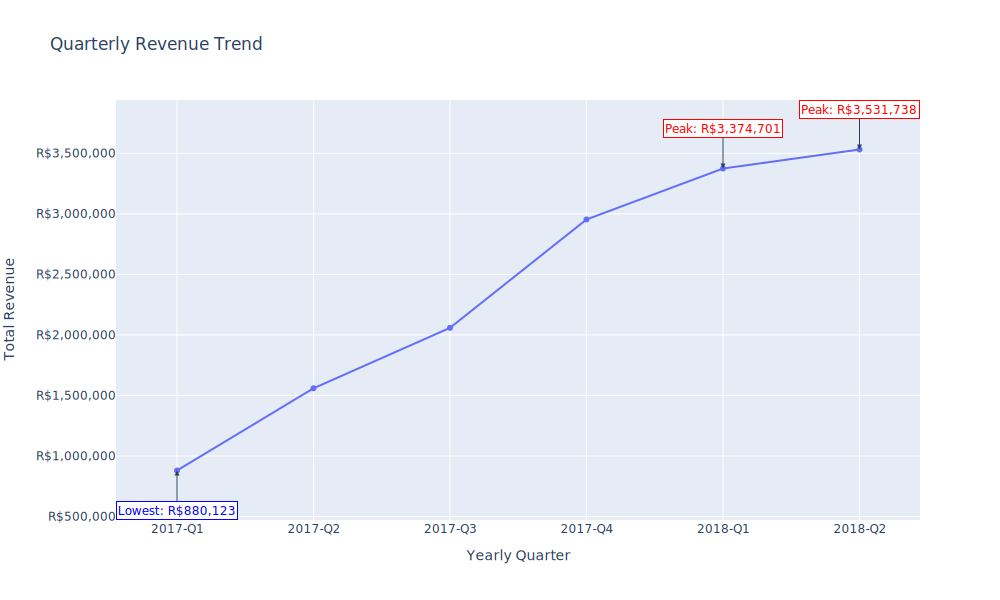

In [59]:
# Converting 'year_quarter' from Period to string for plotting
quarter_total_revenue['year_quarter'] = quarter_total_revenue['year_quarter'].astype(str)

# Find the top 3 peak total_payment_value entries
top_peaks = quarter_total_revenue.nlargest(2, 'total_payment_value')

# Find the lowest total_payment_value entry
lowest_value = quarter_total_revenue.nsmallest(1, 'total_payment_value')

# Creating the plot using Plotly Express
fig = px.line(
    quarter_total_revenue,
    x='year_quarter',
    y='total_payment_value',
    title="Quarterly Revenue Trend",
    labels={'year_quarter': 'Yearly Quarter', 'total_payment_value': 'Total Revenue'},
    markers=True
)

# Highlighting the top 3 peaks
for index, row in top_peaks.iterrows():
    fig.add_annotation(
        x=row['year_quarter'],
        y=row['total_payment_value'],
        text=f'Peak: R${row["total_payment_value"]:,.0f}',
        showarrow=True,
        arrowhead=2,
        ax=0,
        ay=-40,
        font=dict(color='red', size=12),
        bgcolor='white',
        bordercolor='red',
        borderwidth=1
    )

# Highlighting the lowest value
for index, row in lowest_value.iterrows():
    fig.add_annotation(
        x=row['year_quarter'],
        y=row['total_payment_value'],
        text=f'Lowest: R${row["total_payment_value"]:,.0f}',
        showarrow=True,
        arrowhead=2,
        ax=0,
        ay=40,
        font=dict(color='blue', size=12),
        bgcolor='white',
        bordercolor='blue',
        borderwidth=1
    )

# Updated y-axis to show currency format for Brazilian Real
fig.update_layout(
    yaxis_tickprefix='R$',
    yaxis_tickformat=',.0f',
    width=1000,  # Increase the width
    height=600   # Increase the height
)

# Show the plot
fig.show(renderer="svg")


This chart displays the total payment value for orders on a quarterly basis, based on the order purchase date.

The highest payment value was in Q2 2018 (April-June 2018) at R$3,531,738, followed by Q1 2018 (January-March 2018) with R$3,531,738. The lowest was in Q1 2017 (January-March 2017) at R$880,123. 

The chart highlights revenue trends and sales performance over time.

### 2.Total Revenue by Product Category

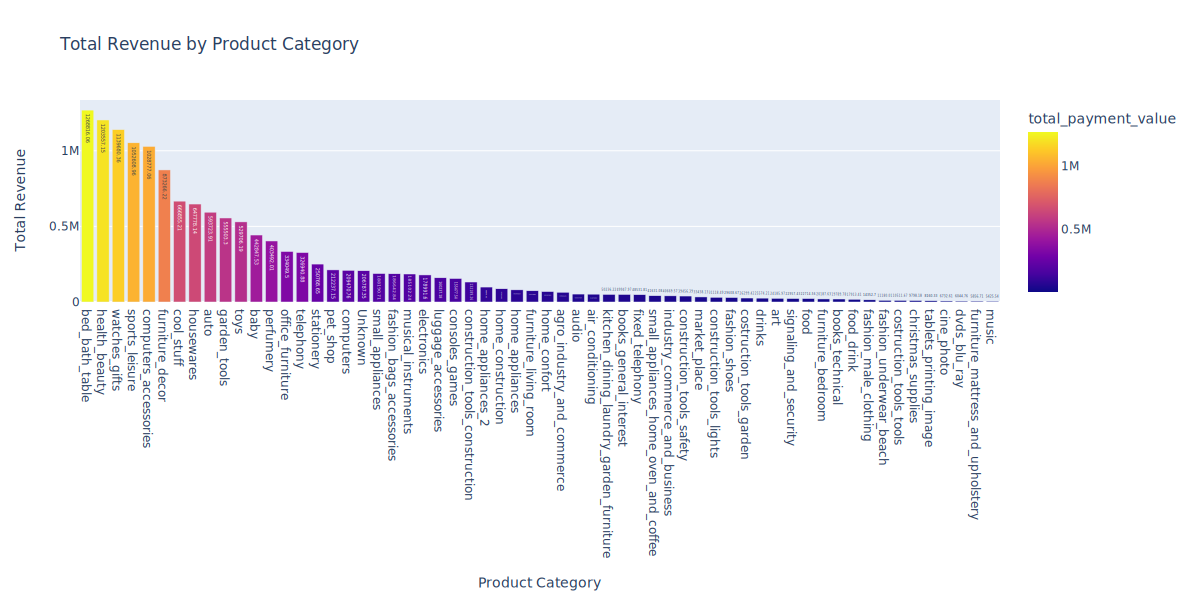

In [60]:
# Calculating total revenue for each product category and sorting in descending order
revenue_by_category  = df_2017_18.groupby('product_category_name_english')['total_payment_value'].sum().sort_values(ascending=False).reset_index()

# Plotting the total revenue for the top 10 product categories
fig = px.bar(
    revenue_by_category.head(60),
    x='product_category_name_english',
    y='total_payment_value',
    title='Total Revenue by Product Category',
    labels={'product_category_name_english': 'Product Category', 'payment_value': 'Total Revenue'},
    text='total_payment_value',color = "total_payment_value"
)

fig.update_layout(
    xaxis_title='Product Category',
    yaxis_title='Total Revenue',
    showlegend=False 
    ,height =  600,
    width = 1200
    
)

fig.show(renderer="svg")


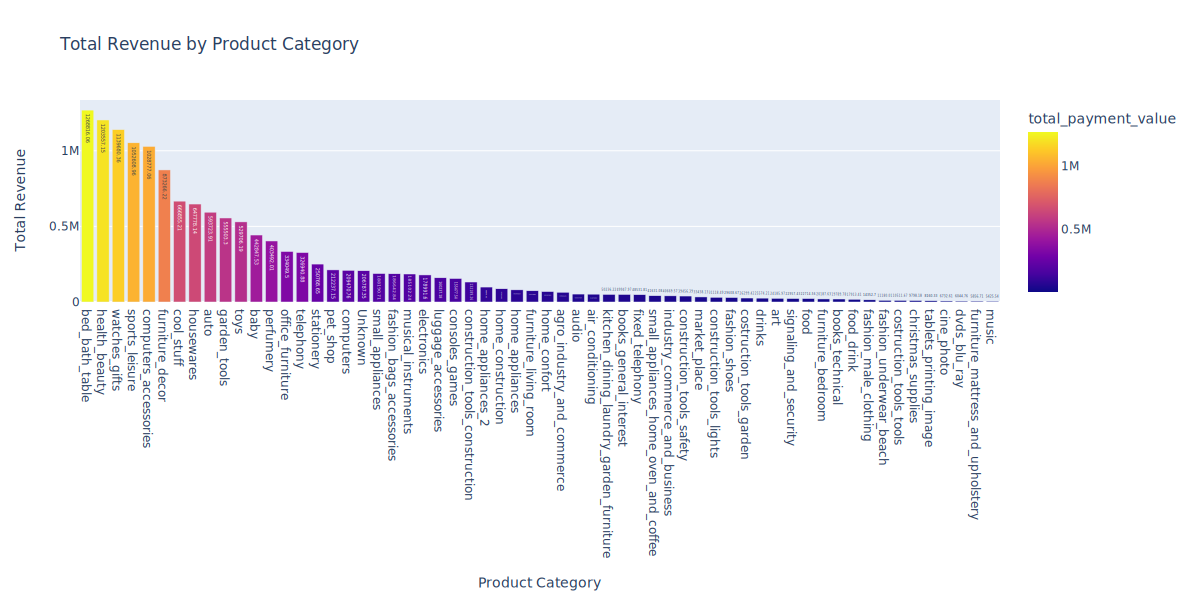

In [61]:
# Plotting the total revenue for the top 10 product categories
fig = px.bar(
    revenue_by_category.head(60),
    x='product_category_name_english',
    y='total_payment_value',
    title='Total Revenue by Product Category',
    labels={'product_category_name_english': 'Product Category', 'payment_value': 'Total Revenue'},
    text='total_payment_value',color = "total_payment_value"
)

fig.update_layout(
    xaxis_title='Product Category',
    yaxis_title='Total Revenue',
    showlegend=False 
    ,height =  600,
    width = 1200
    
)

fig.show(renderer="svg")


### Insights on Total Payment Value by Product Category

- **Top Revenue Generators**: The **bed, bath, and table** category leads in total payment value with **₹1,268,816.06**, indicating strong consumer demand in this segment.
- **Health and Beauty**: Following closely, the **health and beauty** category also performs well, generating **₹1,203,557.15**, highlighting ongoing consumer investment in personal care.
- **Gift Market**: The **watches and gifts** category ranks third with **₹1,139,680.36**, suggesting that consumers are willing to spend on special occasions or presents.
- **Sports and Leisure**: The **sports and leisure** category, at **₹1,052,608.96**, shows significant interest, reflecting a trend toward active lifestyles.
- **Electronics Demand**: The **computers and accessories** category, generating **₹1,028,777.06**, indicates a consistent demand for technology and gadgets.
- **Lower Revenue Categories**: Categories like **garden tools** (**₹555,503.30**) and **auto** (**₹593,723.91**) are at the lower end, suggesting potential opportunities for growth or targeted marketing strategies to boost sales.

Overall, focusing on high-performing categories while exploring growth opportunities in lower-performing ones could enhance overall revenue.

The product categories with the highest revenue on Olist.
These categories represent the top revenue generators, indicating strong consumer interest and spending in these areas.

### 3.Monthly Order Counts

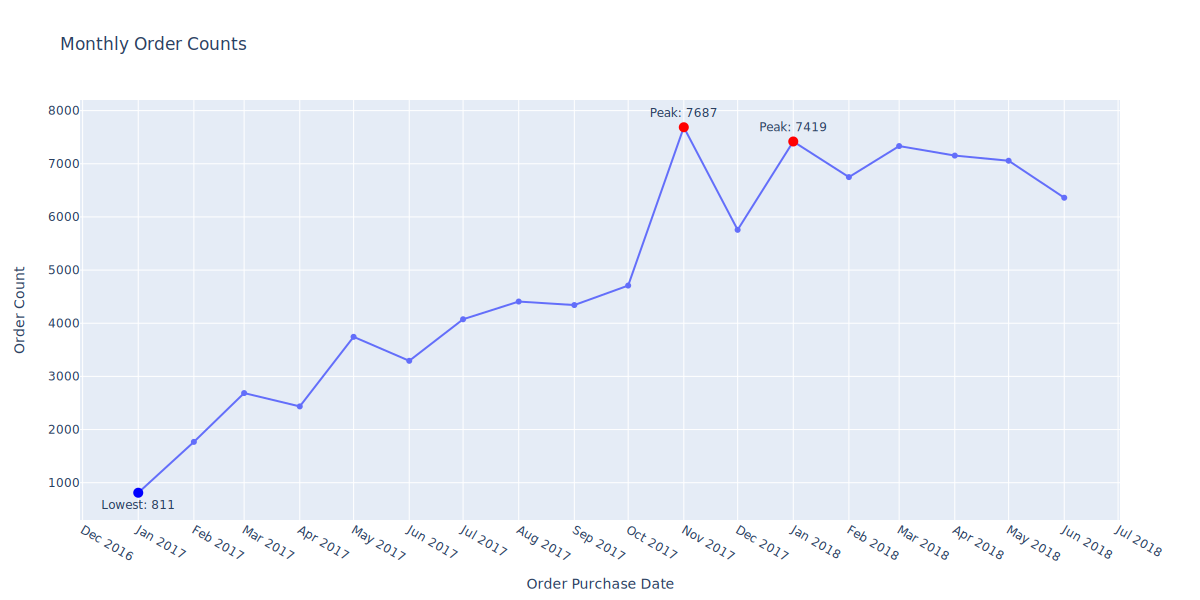

In [62]:
# 1 : Taking the 2 needed columns
orders_placed_trend = df_2017_18[['order_id', 'order_purchase_date']]

#  2: Creating Year and Month columns for grouping
orders_placed_trend['YearMonth'] = orders_placed_trend['order_purchase_date'].dt.to_period('M')

#  3: Grouping by 'YearMonth' and count the number of orders
monthly_order_placed = orders_placed_trend.groupby('YearMonth').agg({'order_id': 'count'}).reset_index()

# Renaming columns for clarity
monthly_order_placed = monthly_order_placed.rename(columns={'order_id': 'order_count'})

# Converting 'YearMonth' to a datetime for plotting
monthly_order_placed['YearMonth'] = monthly_order_placed['YearMonth'].dt.to_timestamp()

# Converting 'YearMonth' to datetime
monthly_order_placed['YearMonth'] = pd.to_datetime(monthly_order_placed['YearMonth'])


# Finding the two peaks and the lowest value
top_peaks = monthly_order_placed.nlargest(2, 'order_count')
lowest_value = monthly_order_placed.nsmallest(1, 'order_count')


# Plot
fig = px.line(
    monthly_order_placed,
    x='YearMonth',
    y='order_count',
    title="Monthly Order Counts",
    labels={'YearMonth': 'Order Purchase Date', 'order_count': 'Order Count'},
    markers=True
)

# Highlighting the top 2 peaks
for index, row in top_peaks.iterrows():
    fig.add_scatter(
        x=[row['YearMonth']],
        y=[row['order_count']],
        mode='markers+text',
        marker=dict(size=10, color='red'),
        text=f"Peak: {row['order_count']}",
        textposition='top center',
        showlegend=False
    )

# Highlighting the lowest value
for index, row in lowest_value.iterrows():
    fig.add_scatter(
        x=[row['YearMonth']],
        y=[row['order_count']],
        mode='markers+text',
        marker=dict(size=10, color='blue'),
        text=f"Lowest: {row['order_count']}",
        textposition='bottom center',
        showlegend=False
    )

# Updating layout to ensure all months are displayed
fig.update_layout(
    xaxis=dict(
        tickmode='linear',
        dtick='M1'  # Set the tick interval to one month
    ),
    width=1200,  # Increase the width
    height=600   # Increase the height
)

# Show the plot
fig.show(renderer="svg")

The chart shows monthly order counts from Jan 2017 to Jun 2018. Orders started at 811 in Jan 20167, peaked at 7,687 in November 2017, then dropped and rose again to 7,419 in January 2018. This trend helps in identifying peak periods for better inventory and staffing planning.

In [63]:
print(f"Total Number of orders placed in Olist between 2017 and 2018 Q2 is {len(df_2017_18['order_id'].unique())}")

Total Number of orders placed in Olist between 2017 and 2018 Q2 is 84593


### 4.Monthly Unique Customers and Running Total of the Customers

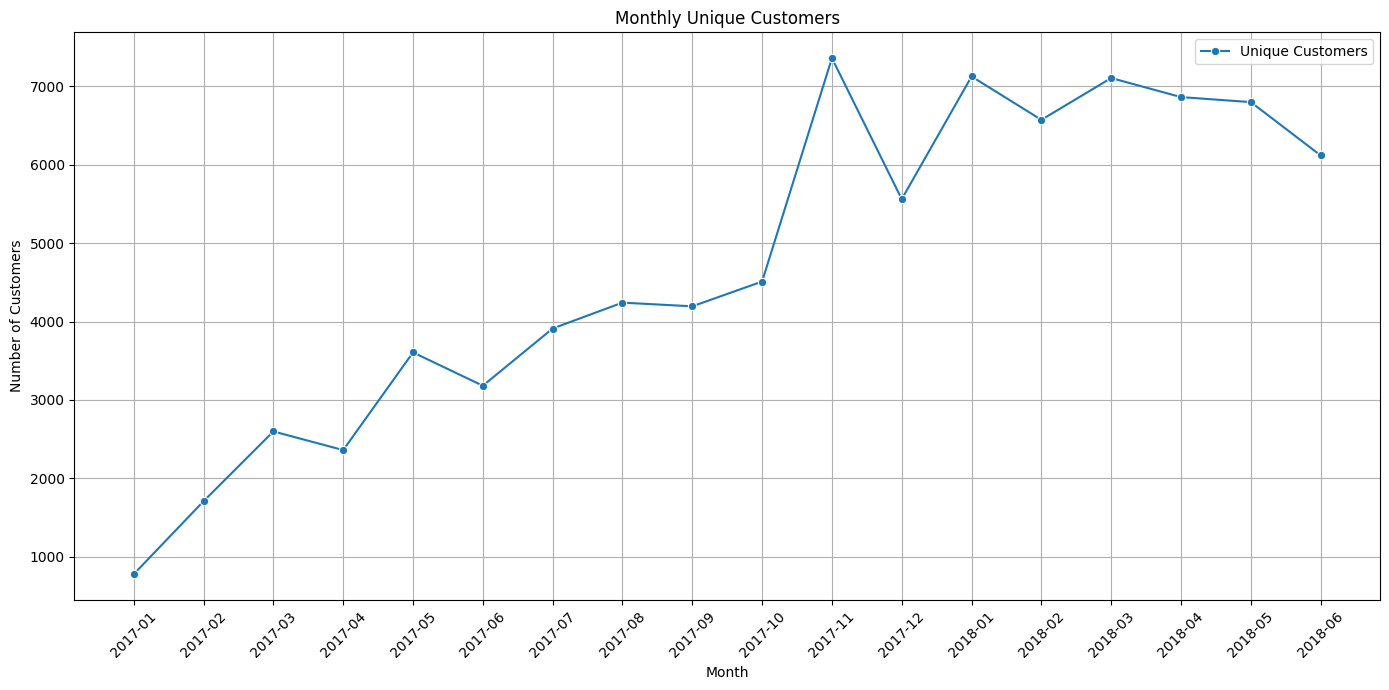

In [64]:
df2 = df_2017_18.copy()

# Assuming df is your DataFrame

# Convert order_purchase_date to datetime
df2['order_purchase_date'] = pd.to_datetime(df2['order_purchase_date'])

# Extract YearMonth from order_purchase_date
df2['YearMonth'] = df2['order_purchase_date'].dt.to_period('M')

# Group by YearMonth and count the unique customers using nunique
monthly_customers = df2.groupby('YearMonth')['customer_id'].nunique().reset_index()
monthly_customers.rename(columns={'customer_id': 'UniqueCustomers'}, inplace=True)

# Calculate the running total of unique customers
monthly_customers['RunningTotalCustomers'] = monthly_customers['UniqueCustomers'].cumsum()

# Convert YearMonth back to string for better plotting
monthly_customers['YearMonth'] = monthly_customers['YearMonth'].astype(str)

# Plotting the above data
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_customers, x='YearMonth', y='UniqueCustomers', marker='o', label='Unique Customers')
plt.xticks(rotation=45)
plt.title('Monthly Unique Customers')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

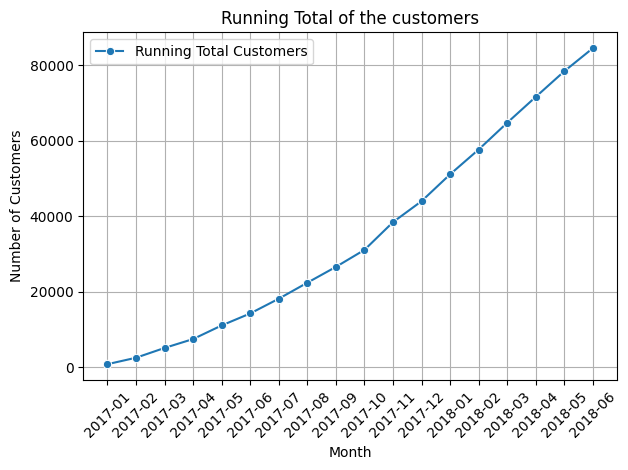

In [65]:
sns.lineplot(data=monthly_customers, x='YearMonth', y='RunningTotalCustomers', marker='o', label='Running Total Customers')

plt.xticks(rotation=45)
plt.title('Running Total of the customers')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

### Insights and Findings

1. **Consistent Growth**: Unique customers increased steadily each month, peaking at 7,360 in November 2017, indicating strong acquisition efforts.

2. **Monthly Fluctuations**: A dip in unique customers to 5,561 in December 2017 suggests seasonal shopping patterns.

3. **Rising Total Customers**: The running total reached 84,593 by June 2018, showing effective customer retention.

4. **Marketing Opportunities**: Monthly peaks highlight potential for targeted promotions during high-demand periods.

# ii) Order and Product Analysis

### 5.Unique Orders Count by Each Product Category

In [66]:
# Count unique orders for each product category
count_product_category = (
    df_2017_18.groupby("product_category_name_english")["order_id"]
    .nunique()  # Count unique order IDs
    .sort_values(ascending=False)
    .reset_index()
)

# Rename the column for clarity
count_product_category.rename(columns={'order_id': 'unique_order_count'}, inplace=True)

# Display the result
count_product_category


,product_category_name_english,unique_order_count
0,bed_bath_table,8224
1,health_beauty,7219
2,sports_leisure,6758
3,computers_accessories,5831
4,furniture_decor,5640
...,...,...
67,la_cuisine,12
68,cds_dvds_musicals,12
69,fashion_childrens_clothes,8
70,arts_and_craftmanship,4


In [67]:
# Count unique orders for each product category
count_product_category = (
    df_2017_18.groupby("product_category_name_english")["order_id"]
    .nunique()  # Count unique order IDs
    .sort_values(ascending=False)
    .reset_index()
)

# Rename the column for clarity
count_product_category.rename(columns={'order_id': 'unique_order_count'}, inplace=True)

# Display the result
count_product_category


,product_category_name_english,unique_order_count
0,bed_bath_table,8224
1,health_beauty,7219
2,sports_leisure,6758
3,computers_accessories,5831
4,furniture_decor,5640
...,...,...
67,la_cuisine,12
68,cds_dvds_musicals,12
69,fashion_childrens_clothes,8
70,arts_and_craftmanship,4


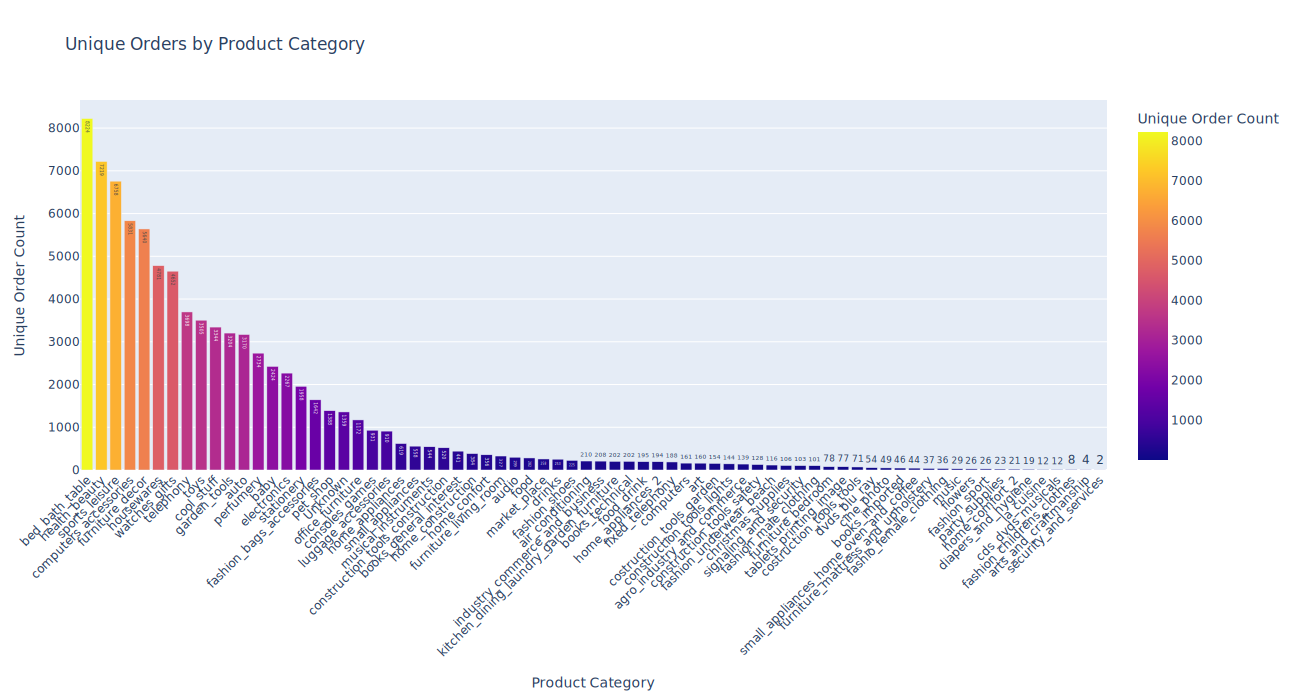

In [68]:
# Plotting the above data
fig = px.bar(
    count_product_category,
    x='product_category_name_english',
    y='unique_order_count',
    title='Unique Orders by Product Category',
    labels={'product_category_name_english': 'Product Category', 'unique_order_count': 'Unique Order Count'},
    color='unique_order_count',  # Color by the count
    text='unique_order_count'  # Show counts on bars
)

# Update layout for better readability
fig.update_layout(
    xaxis_title='Product Category',
    yaxis_title='Unique Order Count',
    xaxis_tickangle=-45,  # Rotating x-axis labels for better visibility
    width=1300,  # Increase the width
    height=700   # Increase the height
)

# Show the plot
fig.show(renderer="svg")


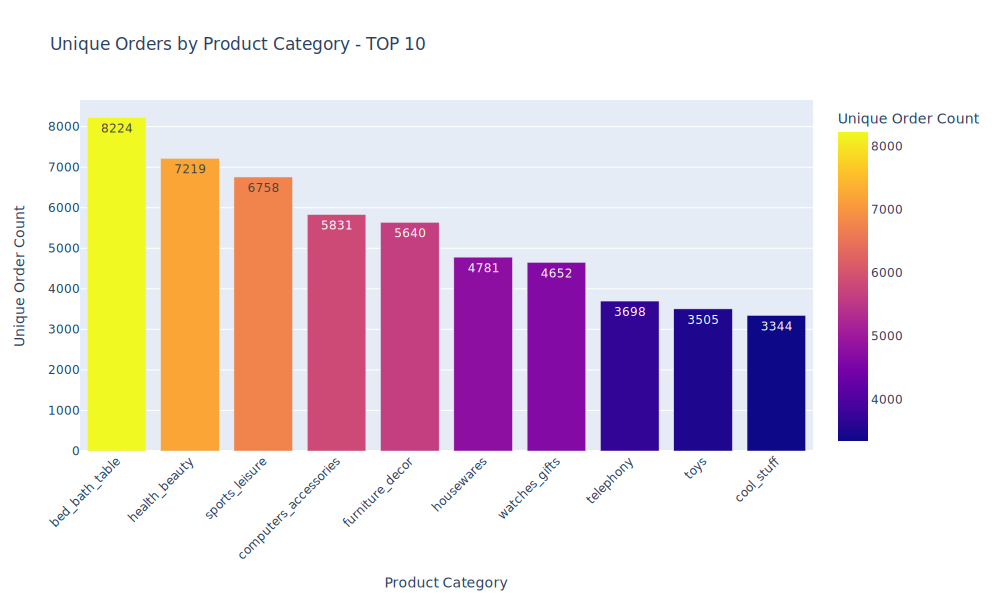

In [69]:
# Plotting the above data
fig = px.bar(
    count_product_category.head(10),
    x='product_category_name_english',
    y='unique_order_count',
    title='Unique Orders by Product Category - TOP 10',
    labels={'product_category_name_english': 'Product Category', 'unique_order_count': 'Unique Order Count'},
    color='unique_order_count',  # Color by the count
    text='unique_order_count'  # Show counts on bars
)

# Update layout for better readability
fig.update_layout(
    xaxis_title='Product Category',
    yaxis_title='Unique Order Count',
    xaxis_tickangle=-45,  # Rotating x-axis labels for better visibility
    width=1000,  # Increase the width
    height=600   # Increase the height
)

# Show the plot
fig.show(renderer="svg")


#### Counting Unique Orders by Product Category

To accurately assess the performance of product categories, we can count the number of unique orders placed for each category. This method helps avoid double counting when multiple products from the same category are ordered together.

### 6.Top 10 Sellers with Unique Number of Orders

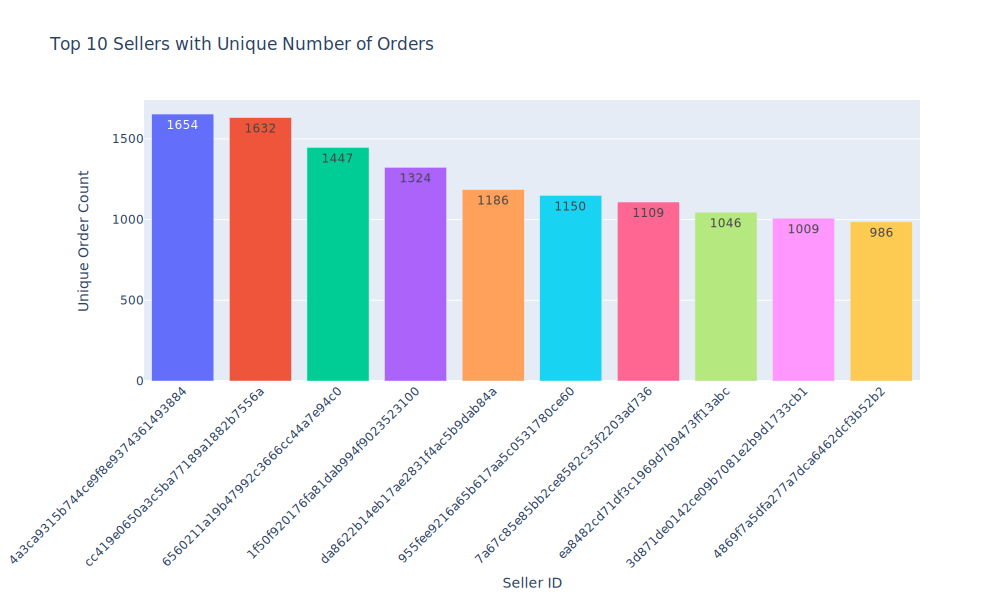

In [70]:
# Grouping by 'seller_id' to count the number of unique orders for each seller
sellers_with_more_orders = df_2017_18.groupby('seller_id')['order_id'].nunique().sort_values(ascending=False).reset_index()

# Renaming the column from 'order_id' to 'count' for clarity
sellers_with_more_orders.rename(columns={"order_id": "count"}, inplace=True)

# Creating a bar chart to visualize the top 10 sellers with the most unique orders
fig = px.bar(
    sellers_with_more_orders.head(10),
    x='seller_id',
    y='count',
    color='seller_id',
    title='Top 10 Sellers with Unique Number of Orders',
    labels={'seller_id': 'Seller ID', 'count': 'Unique Order Count'},
    text='count',  
    height=600,
    width = 1000
)

# Updating layout to improve plot appearance
fig.update_layout(
    xaxis_title='Seller ID',
    yaxis_title='Unique Order Count',
    xaxis_tickangle=-45, showlegend=False 
)

# Show the plot
fig.show(renderer="svg")


#### Unique Orders Count for Sellers

### Method 1: Total Orders Count
**Definition**: Counts all products sold by each seller, regardless of distinct orders.

#### Example:
| Order ID | Customer ID | Product ID | Seller ID | Category      |
|----------|-------------|------------|-----------|---------------|
| O1       | CUS1       | P1         | S1        | Electronics    |
| O1       | CUS1       | P2         | S2        | Furniture      |
| O1       | CUS1       | P3         | S1        | Electronics    |
| O2       | CUS2       | P1         | S1        | Electronics    |

**Total Orders Count Result**:
- **S1**: 3 (O1 for P1 and P3, O2 for P1)
- **S2**: 1 (O1 for P2)

---

### Method 2: Unique Orders Count
**Definition**: Counts distinct orders associated with each seller.

#### Example:
Using the same data:

| Order ID | Customer ID | Product ID | Seller ID | Category      |
|----------|-------------|------------|-----------|---------------|
| O1       | CUS1       | P1         | S1        | Electronics    |
| O1       | CUS1       | P2         | S2        | Furniture      |
| O1       | CUS1       | P3         | S1        | Electronics    |
| O2       | CUS2       | P1         | S1        | Electronics    |

**Unique Orders Count Result**:
- **S1**: 2 (O1 and O2)
- **S2**: 1 (O1)

---

### Summary
- **Total Orders Count**: Measures sales volume.
- **Unique Orders Count**: Reflects customer engagement.


## 7.Order Counts by Location in Brazil

In [71]:
# Group by Location and count the number of unique orders
order_counts = df_2017_18.groupby('customer_state')['order_id'].nunique().reset_index()
order_counts.columns = ['Location', 'OrderCount']
fig = px.bar(order_counts, x='Location', y='OrderCount', title='Order Counts by Location in Brazil')

# Show the plot
fig.show()

## 8.Number of Unique Orders by Day of the Week

In [72]:
# Extract day of the week
df2['day_of_week'] = df2['order_purchase_date'].dt.day_name()

# Group by day of the week and count unique orders
order_counts = df2.groupby('day_of_week')['order_id'].nunique()

# Sort the index for days of the week
order_counts = order_counts.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

fig = px.bar(order_counts, 
             x=order_counts.index, 
             y=order_counts.values, 
             labels={'x': 'Day of the Week', 'y': 'Number of Unique Orders'},
             title='Number of Unique Orders by Day of the Week',color = order_counts.values)

# Show the plot
fig.show()

#### Insights on Orders by Day of the Week

- **Peak Days**: **Monday** has the highest number of unique orders (13,665), followed closely by **Tuesday** (13,504) and **Wednesday** (13,145).
- **Lowest Orders**: **Saturday** records the lowest orders (9,377), indicating a potential decrease in shopping activity over the weekend.
- **Consistent Midweek Activity**: The midweek days (Monday to Wednesday) show a consistent order volume, suggesting that customers are more engaged early in the week.
- **Weekend Trends**: While Sunday (9,340) sees slightly more orders than Saturday, both days show reduced activity compared to weekdays.

These trends could inform targeted marketing strategies to boost sales on lower-performing days, especially weekends.

# iii) Customer Behavior

## 9.Proportion of One-Time vs Repeat Customers

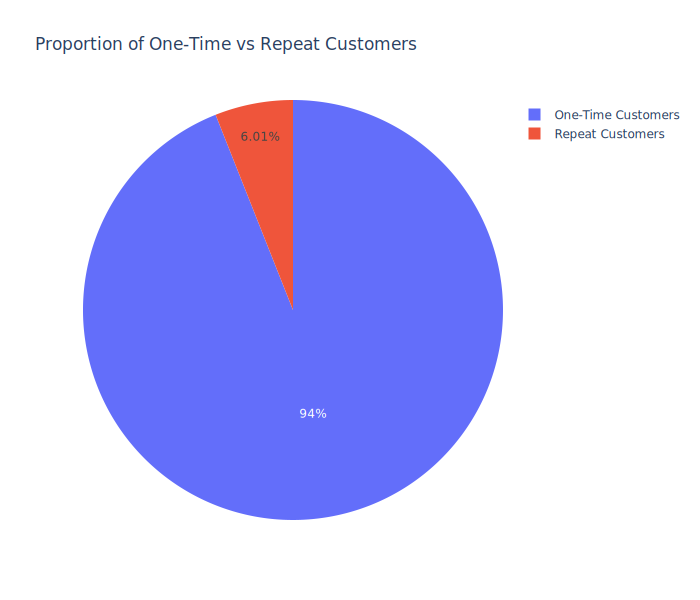

Total Customers: 81861
Number of One-Time Customers: 76943
Number of Repeat Customers: 4918


In [73]:
# Counting the number of purchases per customer using customer_unique_id
customer_purchase_counts = df_2017_18['customer_unique_id'].value_counts()

# Identifying one-time and repeat customers
one_time_customers = customer_purchase_counts[customer_purchase_counts == 1].count()
repeat_customers = customer_purchase_counts[customer_purchase_counts > 1].count()

# Calculating total unique customers using nunique()
total_customers = df_2017_18['customer_unique_id'].nunique()
proportions = {
    'One-Time Customers': one_time_customers / total_customers,
    'Repeat Customers': repeat_customers / total_customers
}

# Creating DataFrame for plotting
proportions_df = pd.DataFrame(list(proportions.items()), columns=['Customer Type', 'Proportion'])

# Plotting pie chart
fig = px.pie(
    proportions_df,
    names='Customer Type',
    values='Proportion',
    title='Proportion of One-Time vs Repeat Customers',
    labels={'Customer Type': 'Customer Type', 'Proportion': 'Proportion'}
)

fig.update_layout(height=600, width=700)

# Show the plot
fig.show(renderer="svg")

# Print summary
print(f"Total Customers: {total_customers}")
print(f"Number of One-Time Customers: {one_time_customers}")
print(f"Number of Repeat Customers: {repeat_customers}")


#### Customer Purchase Analysis

- **Total Number of Customers**: 81861
- **Number of One-Time Customers**: 76943
- **Number of Repeat Customers**: 4918

### Proportion of One-Time vs Repeat Customers

- **One-Time Customers**: 94%
- **Repeat Customers**: 6%

The pie chart visualizes the proportion of one-time versus repeat customers, highlighting the distribution of customer purchase behavior. This analysis helps in understanding customer retention and loyalty patterns.


## 10.Percentage of Total Sales by Repeat Customers

In [74]:
# Calculating total sales (excluding unavailable and canceled orders)

total_sales = df_2017_18['total_payment_value'].sum()

# Counting purchases per customer using customer_unique_id
customer_purchase_counts = df_2017_18['customer_unique_id'].value_counts()

# Identifying repeat customers (those with more than 1 purchase)
repeat_customers = customer_purchase_counts[customer_purchase_counts > 1].index

# Filtering sales for repeat customers
repeat_customers_sales = df_2017_18[df_2017_18['customer_unique_id'].isin(repeat_customers)]['total_payment_value'].sum()

# Calculating percentage of total sales by repeat customers
percentage_repeat_customers_sales = (repeat_customers_sales / total_sales) * 100

# Print result
print(f"Percentage of Total Sales by Repeat Customers: {percentage_repeat_customers_sales:.2f}%")


Percentage of Total Sales by Repeat Customers: 15.18%


#### Percentage of Total Sales by Repeat Customers: 15.18%

## 11.Monthly Active Customers Count

In [75]:
# Creating a copy of the original DataFrame
df1 = df_2017_18.copy()

# Convert to datetime directly
df1['order_delivered_customer_date'] = pd.to_datetime(df1['order_delivered_customer_date'], errors='coerce')
df1['order_estimated_delivery_date'] = pd.to_datetime(df1['order_estimated_delivery_date'], errors='coerce')

In [76]:
# Extract year and month from the order_purchase_date
df1['year_month'] = df1['order_purchase_date'].dt.to_period('M').astype(str)

# Group by year_month and count unique customer IDs
monthly_active_customers = df1.groupby('year_month')['customer_unique_id'].nunique().reset_index()

# Rename the columns for clarity
monthly_active_customers.columns = ['YearMonth', 'ActiveCustomers']

# Display the resulting DataFrame
print(monthly_active_customers)

   YearMonth  ActiveCustomers
0    2017-01              743
1    2017-02             1683
2    2017-03             2558
3    2017-04             2328
4    2017-05             3537
5    2017-06             3118
6    2017-07             3837
7    2017-08             4162
8    2017-09             4122
9    2017-10             4445
10   2017-11             7254
11   2017-12             5498
12   2018-01             7027
13   2018-02             6419
14   2018-03             7016
15   2018-04             6808
16   2018-05             6741
17   2018-06             6080


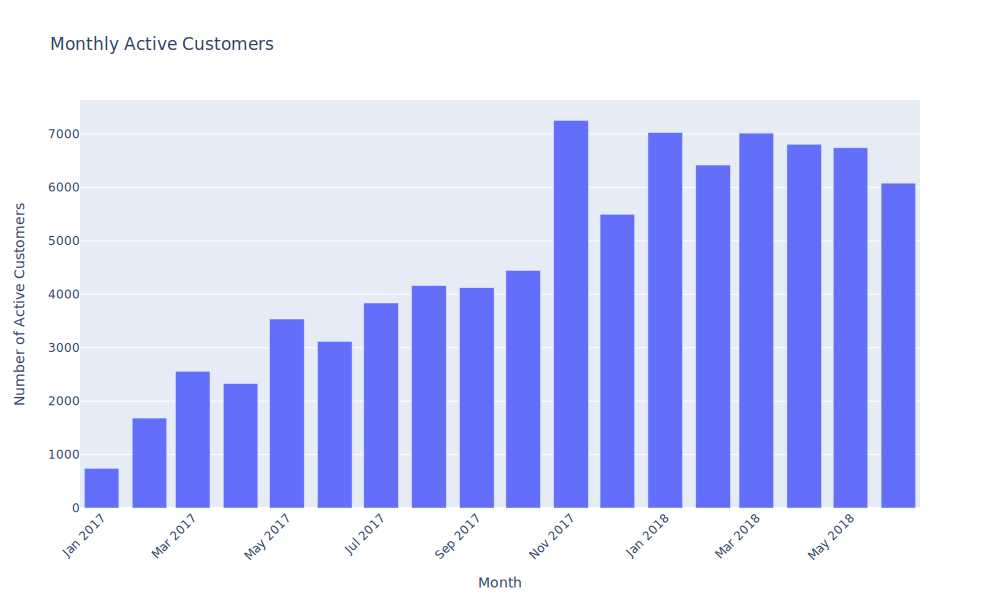

In [77]:
# Plotting the data using Plotly Express
fig = px.bar(
    monthly_active_customers,
    x='YearMonth',
    y='ActiveCustomers',
    title='Monthly Active Customers',
    labels={'YearMonth': 'Month', 'ActiveCustomers': 'Number of Active Customers'}
)

fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Number of Active Customers',
    xaxis_tickangle=-45,
    height = 600,
    width = 1000
)

# Show the plot
fig.show(renderer="svg")

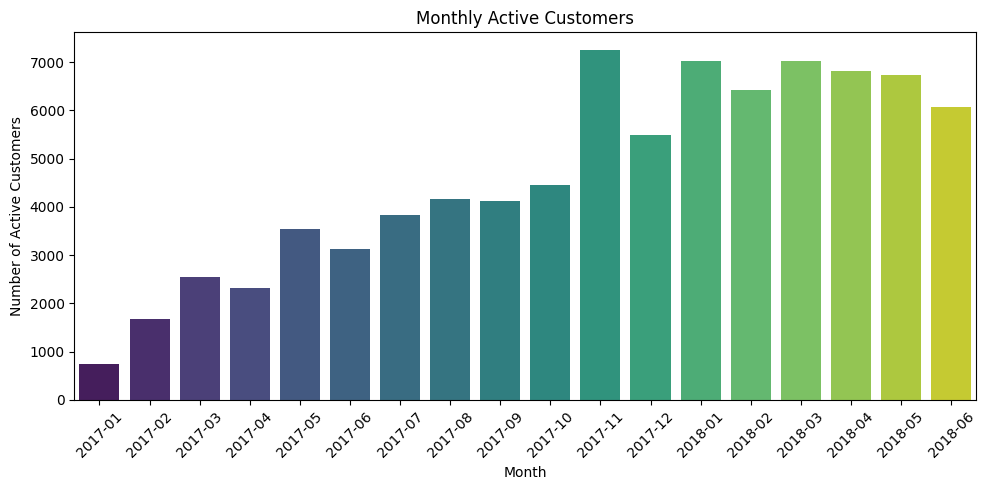

In [78]:
# Unable to create plot propely for this data in plotly so using seaborn

plt.figure(figsize=(10, 5))

sns.barplot(
    monthly_active_customers,
    x='YearMonth',
    y='ActiveCustomers',palette='viridis'
)
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set titles and labels
plt.title('Monthly Active Customers')
plt.xlabel('Month')
plt.ylabel('Number of Active Customers')

# Show the plot
plt.tight_layout()
plt.show()


#### Observations on Monthly Active Customers

- **Upward Trend**: Active customers increased from **743** in January 2017 to a peak of **7,254** in November 2017.
  
- **Fluctuations**: Monthly active customers varied, with numbers staying high in 2018, ranging from **6,080** to **7,027**.

- **Conclusion**: The data highlights a growing active customer base with seasonal peaks, suggesting opportunities for enhanced engagement strategies during high-traffic months.


# iv) Customer Preferences and Patterns

## 12.Preferred Payment Modes by Customers

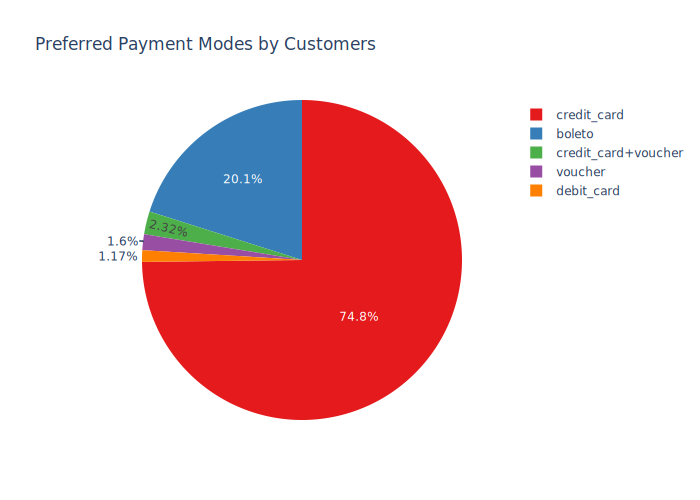

In [79]:

# Step 1: Drop duplicates based on order ID and payment mode
unique_orders = df_2017_18[['order_id', 'payment_types']].drop_duplicates()

# Step 2: Count occurrences of each payment mode
payment_mode_counts = unique_orders['payment_types'].value_counts().reset_index()
payment_mode_counts.columns = ['Payment Mode', 'Count']

# Now payment_mode_counts will reflect the preferred payment modes accurately

# Step 2: Plotting the data
fig = px.pie(
    payment_mode_counts,
    names='Payment Mode',
    values='Count',
    title='Preferred Payment Modes by Customers',
    color='Payment Mode',
    color_discrete_sequence=px.colors.qualitative.Set1
)

# Show the plot
fig.show(renderer="svg")

### Findings on Preferred Payment Modes

- **Primary Choice**: The **credit card** remains the dominant payment method, with **63,284 transactions** (Around 75% of total)., representing a significant majority.
- **Second in Line**: The **boleto** method is the second most preferred, with **17,005 transactions** (Approximately 20%)., indicating a solid but lesser popularity compared to credit cards.
- **Other Options (Approximately 5%)**: 
  - **Credit Card + Voucher**: 1,961 transactions.
  - **Voucher**: 1,352 transactions.
  - **Debit Card**: 991 transactions.

### Summary
The analysis reveals a strong preference for credit cards among customers, suggesting a focus on enhancing this payment option could improve customer satisfaction. The substantial use of boleto indicates a valuable secondary option. However, lower transaction counts for other payment methods suggest opportunities for targeted marketing or education to boost their usage.

## 13.Preferred Number of Installments for Payment

In [80]:
# Step 1: Drop duplicates based on order ID and installment count
unique_installments = df_2017_18[['order_id', 'total_installments']].drop_duplicates()

# Step 2: Count occurrences of each installment option
installment_counts = unique_installments['total_installments'].value_counts().reset_index()
installment_counts.columns = ['Number of Installments', 'Count']

# Now installment_counts will show the preferred number of installments accurately
installment_counts.head(4)


,Number of Installments,Count
0,1,39020
1,2,11631
2,3,9155
3,4,6160


In [81]:
# Plotting the bar chart
fig = px.bar(
    installment_counts.head(15),
    x='Number of Installments',
    y='Count',
    title='Preferred Number of Installments for Payment',
    labels={'Number of Installments': 'Number of Installments', 'Count': 'Number of Customers'},
    color='Count',
    color_continuous_scale='Viridis'
)

# Update layout
fig.update_layout(
    xaxis_title='Number of Installments',
    yaxis_title='Number of Customers',
    xaxis=dict(tickmode='linear'),
    yaxis=dict(range=[0, installment_counts['Count'].max() + 5000])
)

# Show the plot
fig.show()

### Insights on Number of Installments

1. **Single Payment Preference**: The majority of customers (39,020) prefer to pay in **1 installment**, indicating a strong preference for immediate payments.

2. **Interest in Split Payments**: **2 installments** are also popular, with **11,631** transactions, showing some willingness to divide payments.

3. **Declining Popularity**: As the number of installments increases, participation drops sharply. For example, only **9,155** customers chose **3 installments**.

4. **Limited Use of Longer Plans**: Options beyond **10 installments** see very low engagement, with only **10** customers opting for **20 installments**. This suggests customers prefer shorter payment commitments.

5. **Zero Installments**: Two instances of zero installments may indicate errors or full upfront payments.

### Summary
Overall, customers favor simplicity in payments, gravitating toward single or minimal installment options. This insight highlights the importance of offering straightforward payment solutions.

## 14.Customer Density by Geolocation

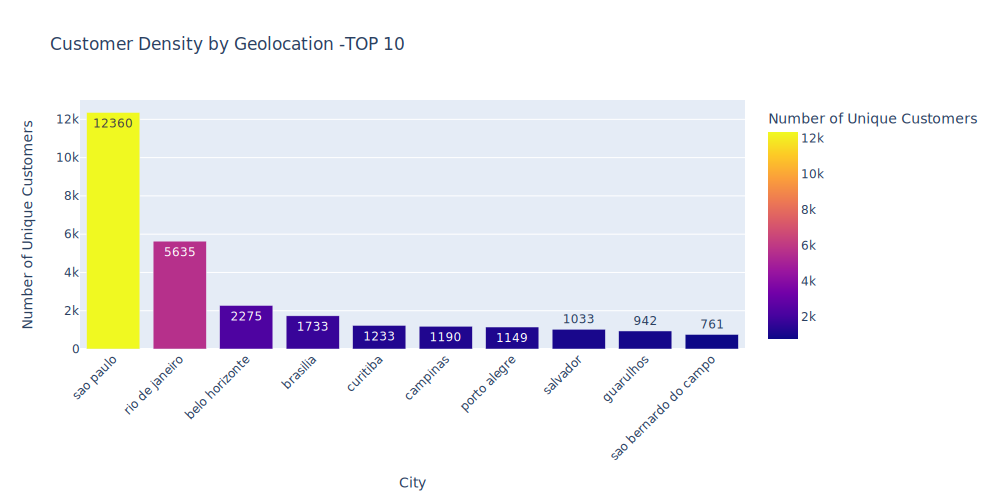

In [82]:
# Calculating the number of unique customers per city and sorting in descending order using customer_unique_id
customer_geo_density = df_2017_18.groupby('customer_city')['customer_unique_id'].nunique().sort_values(ascending=False).reset_index(name='customer_count')

# Plotting customer density for the top 10 cities
fig = px.bar(
    customer_geo_density.head(10),
    x='customer_city',
    y='customer_count',
    title='Customer Density by Geolocation -TOP 10',
    labels={'customer_city': 'City', 'customer_count': 'Number of Unique Customers'},
    text='customer_count',
    height=500,
    width= 1000,
    color = "customer_count"
)

# Update layout
fig.update_layout(
    xaxis_title='City',
    yaxis_title='Number of Unique Customers',
    xaxis_tickangle=-45, showlegend=False
)

# Show plot
fig.show(renderer="svg")


The bar plot  displays the number of unique customers in the top 10 cities. Sao Paulo leads with the highest customer count, followed by Rio de Janeiro and Belo Horizonte. This information can help in understanding the geographic distribution of customers and targeting marketing efforts effectively.

In [83]:
# Calculating Average Review Scores by Seller
seller_ratings = round(df_2017_18.groupby('seller_id')['review_score'].mean().reset_index(), 2)
seller_ratings.rename(columns={'review_score': 'average_rating'}, inplace=True)

# Calculating Total Sales by Seller (Counting Unique Order IDs)
seller_sales = df_2017_18.groupby('seller_id')['order_id'].nunique().reset_index()
seller_sales.rename(columns={'order_id': 'unique_order_count'}, inplace=True)

# Merging the two metrics
seller_metrics = pd.merge(seller_ratings, seller_sales, on='seller_id')

# Sorting the metrics
seller_metrics = seller_metrics.sort_values(by=['average_rating', 'unique_order_count'], ascending=[False, False]).reset_index(drop=True)

# Display the result
seller_metrics


,seller_id,average_rating,unique_order_count
0,48efc9d94a9834137efd9ea76b065a38,5.0,32
1,2addf05f476d0637864454e93ba673d5,5.0,12
2,b2eecf5ea250510da76590ca79d60e5d,5.0,9
3,293dee954235e4e4e43f129313625ebe,5.0,8
4,5b2e94f2c22b39ccc24d34ad0f669672,5.0,8
...,...,...,...
2684,f524ad65d7e0f1daab730ef2d2e86196,1.0,1
2685,f9eda05b67bef472deaddbba84aca289,1.0,1
2686,fa7ad8ae9bcb2c4493fdf38e96b1d74f,1.0,1
2687,fc6295add6f51a0936407ead70c1001d,1.0,1


Sellers with average rating with their sales volume

This analysis calculates the average review scores and total unique sales for each seller, providing insights into seller performance.

### Key Metrics
1. **Average Review Rating**: Measures customer satisfaction.
2. **Unique Order Count**: Indicates the number of distinct transactions per seller.

### Insight
By merging these metrics, we can identify top-performing sellers who not only receive high ratings but also generate significant sales. This dual perspective helps in evaluating seller effectiveness and customer engagement.


# V) Delivery and Rating Analysis

## 15. Order Delivery Status Distribution

In [84]:
# Assuming 'order_id' is the unique identifier for each order
# Aggregate delivery metrics by order ID
delivery_summary = df1.groupby('order_id').agg({
    'order_delivered_customer_date': 'first',  # Get the first delivery date
    'order_estimated_delivery_date': 'first'   # Get the first estimated delivery date
}).reset_index()

# Calculate delivery metrics
delivery_summary['delivered_before_expected'] = delivery_summary['order_delivered_customer_date'] < delivery_summary['order_estimated_delivery_date']
delivery_summary['delivered_after_expected'] = delivery_summary['order_delivered_customer_date'] > delivery_summary['order_estimated_delivery_date']
delivery_summary['delivered_on_expected'] = delivery_summary['order_delivered_customer_date'] == delivery_summary['order_estimated_delivery_date']

# Count each metric
delivered_before = delivery_summary['delivered_before_expected'].sum()
delivered_after = delivery_summary['delivered_after_expected'].sum()
delivered_on_time = delivery_summary['delivered_on_expected'].sum()

# Create a DataFrame for plotting
delivery_metrics = pd.DataFrame({
    'Delivery Status': ['Delivered Before Expected', 'Delivered After Expected', 'Delivered On Time'],
    'Count': [delivered_before, delivered_after, delivered_on_time]
})

# Ploting pie chart
fig = px.pie(
    delivery_metrics,
    names='Delivery Status',
    values='Count',
    title='Order Delivery Status Distribution',
    color_discrete_sequence=['green', 'red', 'blue']
)

fig.update_layout(
    annotations=[dict(text='Delivery Status', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

# Show the plot
fig.show()


In [85]:
delivery_metrics

,Delivery Status,Count
0,Delivered Before Expected,76371
1,Delivered After Expected,6741
2,Delivered On Time,1481


The pie chart below visualizes the distribution of orders based on their delivery status:

**Delivered Before Expected:** 7,6371 orders (90.0%)

**Delivered After Expected:** 6,741 orders (8%)

**Delivered On Time:** 1,481 orders (2%)



## 16.Number of Unique Orders by Rating Score

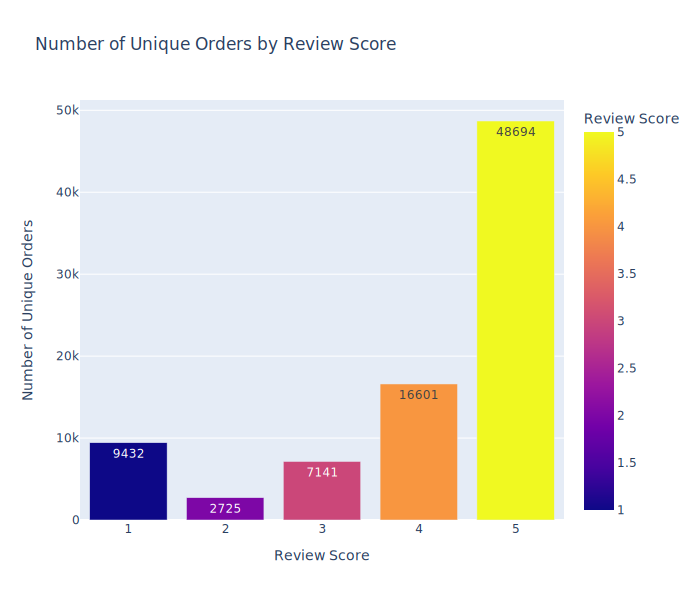

In [86]:
# Grouping the review score column by its ratings and finding the number of unique orders that received each rating
grouped_reviewscore_byorders = df_2017_18.groupby('review_score')['order_id'].nunique().reset_index(name='order_count')

# Plotting a bar chart
fig = px.bar(
    grouped_reviewscore_byorders,
    x='review_score',
    y='order_count',
    title='Number of Unique Orders by Review Score',
    labels={'review_score': 'Review Score', 'order_count': 'Number of Unique Orders'},
    text='order_count',
    height=600,
    color="review_score"
)

fig.update_layout(
    xaxis_title='Review Score',
    yaxis_title='Number of Unique Orders',
)

# Show the plot
fig.show(renderer="svg")


### Insights on Order Count by Review Score

- **Top Rating Performance**: Sellers with a **5.0** review score receive the highest order count at **48,694**. This indicates that top-rated sellers are significantly favored by customers.
- **High Satisfaction**: The **4.0** rating also shows strong performance with **16,601** orders, suggesting that many customers are satisfied but not at the highest level.
- **Mixed Experiences**: The **3.0** review score accounts for **7,141** orders, reflecting a mixed experience for customers.
- **Lower Ratings Impact**: Orders drop sharply for lower ratings: **2.0** (2,725 orders) and **1.0** (9,432 orders). This highlights that poor ratings are linked to higher order counts, indicating a potentially high volume of complaints or issues.

Overall, this data suggests that higher review scores correlate strongly with order volume, emphasizing the importance of maintaining quality for increased customer satisfaction and sales.

## 17.Seller Count by Review Score

In [87]:
# Calculating the average review score for each seller and rounding to the nearest whole number
sellersandmeanscore = round(df_2017_18.groupby('seller_id')['review_score'].mean(),0).reset_index()

# Grouping the review score column by its ratings & finding the no of sellers placed under each rating 
grouped_reviewscore = sellersandmeanscore.groupby('review_score')['seller_id'].count().sort_values(ascending = False).reset_index(name = 'count')
# Show the result
grouped_reviewscore 

,review_score,count
0,4.0,1511
1,5.0,721
2,3.0,248
3,1.0,123
4,2.0,86


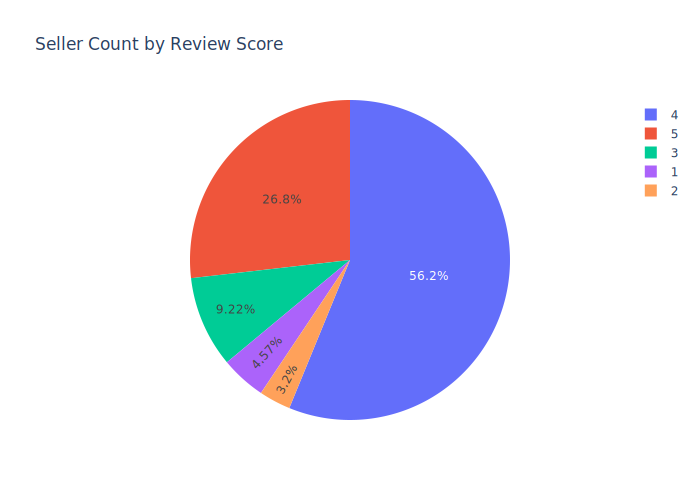

In [88]:

# Ploting the above data in a pie chart
fig = px.pie(
    grouped_reviewscore,
    names='review_score',
    values='count',
    title='Seller Count by Review Score',
    labels={'review_score': 'Review Score', 'count': 'Number of Sellers'}
)

# Show the plot
fig.show(renderer="svg")

### Insights on Seller Count by Review Score

The pie chart illustrates the distribution of sellers based on their average review scores. Each slice of the pie represents a review score rating, with the size of the slice indicating the number of sellers that fall into each rating category.

- **Highest Performance**: Sellers with a **4.0** review score are the most numerous (1,511), indicating a strong overall satisfaction among customers.
- **Top Rating**: There are **721** sellers with a perfect **5.0** rating, suggesting a notable subset of high-quality sellers.
- **Lower Ratings**: The number of sellers decreases significantly for lower ratings: **3.0** (248), **2.0** (86), and **1.0** (123). This suggests that poor ratings are less common among sellers, potentially highlighting a selection of underperformers.
- **Quality Focus**: The majority of sellers maintain a rating of **4.0 or higher**, indicating that customers generally have a positive experience with the sellers.

These insights can help in identifying high-performing sellers for partnerships or promotions while also addressing concerns with lower-rated sellers.

In [89]:
# # Calculating the total amount of payments from canceled and unavailable orders
# canceled_order_amount = df[df['order_status'].isin(['canceled','unavailable'])]['payment_value'].sum()
# canceled_order_amount = round(canceled_order_amount,0)

# # Finding the percentage loss due to canceled orders
# all_revenue = order_payments_df['payment_value'].sum()
# percentage_loss = round((canceled_order_amount/all_revenue)*100,2)


# print(f'The canceled orders amount to the company is R${canceled_order_amount}')
# print(f"The company lost {percentage_loss}% of it's revenue due to canceled orders")

## 18.Average Delivery Time by Product Category

In [90]:
# Calculate delivery time
df_2017_18['delivery_time'] = (df_2017_18['order_delivered_customer_date'] - df_2017_18['order_purchase_date']).dt.days

# Remove duplicate orders
df_unique_orders = df_2017_18.drop_duplicates(subset='order_id')

# Group by product category and calculate average delivery time
delivery_time_by_category = df_unique_orders.groupby('product_category_name_english')['delivery_time'].mean().reset_index()
delivery_time_by_category = delivery_time_by_category.sort_values(by='delivery_time', ascending=False)

# Plotting with Plotly Express
fig = px.bar(
    delivery_time_by_category,
    x='delivery_time',
    y='product_category_name_english',
    orientation='h',
    title='Average Delivery Time by Product Category',
    labels={'delivery_time': 'Average Delivery Time (Days)', 'product_category_name_english': 'Product Category'},
    color='delivery_time',
    color_continuous_scale='viridis'
)

fig.update_layout(
    xaxis_title='Average Delivery Time (Days)',
    yaxis_title='Product Category',
    coloraxis_colorbar=dict(title="Days"),
    title_x=0.5, height = 700
)

fig.show()


### Key Findings

- **Longest Delivery Times**:
  - **Office Furniture**: 20.52 days
  - **Christmas Supplies**: 16.10 days

- **Mid-Range Categories**:
  - **Furniture Bedroom**: 15.81 days
  - **Fashion Shoes**: 15.72 days

- **Quick Deliveries**:
  - **Arts and Craftsmanship**: 5.33 days
  - **La Cuisine**: 6.55 days

### Recommendations
- **Address Delays**: Focus on improving logistics for categories with delivery times over 15 days.
- **Investigate Middle Ranges**: Identify bottlenecks affecting categories around 15 days.
- **Leverage Fast Categories**: Maintain and replicate successful strategies in quick delivery segments.

These insights highlight areas for operational improvement and customer satisfaction enhancement.

## 19.Actual vs Estimated Delivery Time by Product Category

In [91]:
# Calculate actual and estimated delivery times

df_2017_18['estimated_delivery_time'] = (df_2017_18['order_estimated_delivery_date'] - df_2017_18['order_purchase_date']).dt.days

# Remove duplicate orders
df_unique_orders = df_2017_18.drop_duplicates(subset='order_id')

# Group by product category and calculate average actual and estimated delivery times
delivery_times_by_category = df_unique_orders.groupby('product_category_name_english').agg({
    'delivery_time': 'mean',
    'estimated_delivery_time': 'mean'
}).reset_index()
delivery_times_by_category = delivery_times_by_category.sort_values(by='delivery_time', ascending=False)

# Melt the data for Plotly Express
df_melted = delivery_times_by_category.melt(id_vars='product_category_name_english', 
                                             value_vars=['delivery_time', 'estimated_delivery_time'],
                                             var_name='Delivery_Type', 
                                             value_name='Delivery_Time')

# Plotting with Plotly Express
fig = px.bar(
    df_melted,
    x='Delivery_Time',
    y='product_category_name_english',
    color='Delivery_Type',
    barmode='group',
    orientation='h',
    title='Actual vs Estimated Delivery Time by Product Category',
    labels={'Delivery_Time': 'Average Delivery Time (Days)', 'product_category_name_english': 'Product Category'}
)

fig.update_layout(
    xaxis_title='Average Delivery Time (Days)',
    yaxis_title='Product Category',
    title_x=0.5, height = 700
)

fig.show()


### Summary of Data Properties
- **Delivery Time Range**: 
  - Actual delivery times range from **5.33 days** (Arts and Craftsmanship) to **20.52 days** (Office Furniture).
  - Estimated delivery times range from **17.91 days** (Books Imported) to **31.62 days** (Office Furniture).

### Key Insights

1. **Categories with Significant Delivery Delays**:
   - **Office Furniture** shows a notable difference between estimated (31.62 days) and actual (20.52 days) delivery times, indicating potential overestimation in delivery predictions.
   - **Christmas Supplies** and **Furniture Bedroom** also demonstrate large discrepancies, suggesting a need for better forecasting methods.

2. **Categories with Minimal Delivery Times**:
   - **Arts and Craftsmanship** has the shortest actual delivery time of **5.33 days**, indicating efficient processing, but its estimated delivery time (18.33 days) suggests potential for improved estimation practices.

3. **Underestimated Delivery Categories**:
   - **La Cuisine** has a substantial difference, where the actual delivery time (6.55 days) is significantly shorter than the estimated (22.82 days), reflecting excellent operational efficiency that could be highlighted in marketing.

4. **General Trends**:
   - Most categories show actual delivery times lower than estimated, implying a trend of overestimating delivery durations. This may lead to reduced customer satisfaction if expectations are set too high.

### Strategic Recommendations
- **Improve Estimation Models**: 
  - Regularly analyze delivery performance to refine estimation processes and align more closely with actual delivery times.

- **Focus on High Discrepancy Categories**: 
  - Investigate logistical issues for categories with significant differences to enhance efficiency.

- **Leverage Efficient Categories**: 
  - Promote categories with quicker delivery times (like Arts and Craftsmanship) to attract customers seeking fast shipping options.

### Conclusion
Enhancing delivery time accuracy and addressing operational inefficiencies in high-discrepancy categories can lead to improved customer satisfaction and operational performance.

# VI) Cancellations and Miscellaneous

## 20.Total Cancelled Orders

In [92]:
# Calculating the total number of canceled and unavailable orders
total_cancelled_orders = orders_df[orders_df['order_status'].isin(['canceled', 'unavailable'])].shape[0]

print(f'The total number of canceled orders on Olist is {total_cancelled_orders}.')


The total number of canceled orders on Olist is 1234.


In [93]:
# df_2017_18.delivered_before_expected = df_2017_18.delivered_before_expected.map({True : 1, False : 0})
# df_2017_18.delivered_after_expected = df_2017_18.delivered_after_expected.map({True : 1, False : 0})
# df_2017_18.delivered_on_expected = df_2017_18.delivered_on_expected.map({True : 1, False : 0})

In [95]:
df_2017_18.to_csv(r"D:\DATA SCIENCE ZONE\Projects\project_5 _E-commerce_Data\In-Depth E-commerce Data Analysis and Customer Segmentation\Dataset\olist\cleaned_df.csv",index = False)